In [77]:
import time
import pickle
import numpy as np
import pandas as pd

In [80]:
text_file = r"E:\Python_Workplace\OptimalDistinct\Cluster\code\sbert_similarity_results_allcat_with_language.csv"
df = pd.read_csv(text_file)
print(df.columns)
# df_2 = df.iloc[:, :17]
# df_2.columns.values[9] = 'Conversion_start'
# df_2.to_csv(text_file, index=False)
# print(df_2.columns)
for each in df["Description_cleaned"]:
    if ("GPT" in each) or ("gpt" in each):
        print(each)

Index(['GPTs_ID', 'GPTs_Name', 'Description', 'Rating', 'Number of Ratings',
       'Conversions', 'Author URL', 'Author', 'Features', 'Conversion_start',
       'num_rate', 'Website', 'Linkedin', 'Github', 'Twitter', 'num_of_links',
       'map_Category', 'Primary_Language', 'Description_cleaned',
       'Features_cleaned', 'Conversion_start_cleaned'],
      dtype='object')


<Axes: >

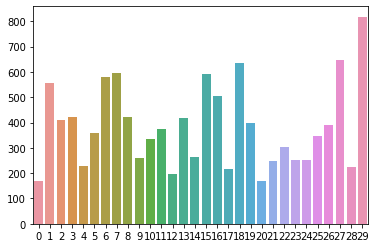

In [42]:
category_counts = df["Description_Cluster"].value_counts()
import seaborn as sns
sns.barplot(x=category_counts.index, y=category_counts.values)

In [43]:
language_summary = df['Primary_Language'].value_counts()
print(language_summary)

en    11578
Name: Primary_Language, dtype: int64


<Axes: >

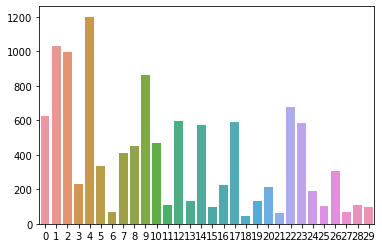

In [44]:
category_counts = df["Features_Cluster"].value_counts()
import seaborn as sns
sns.barplot(x=category_counts.index, y=category_counts.values)

<Axes: >

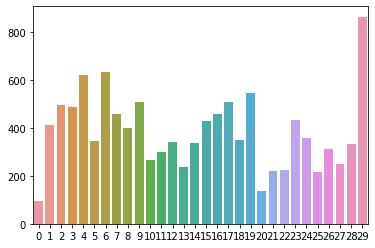

In [45]:
category_counts = df["Conversion_Cluster"].value_counts()
import seaborn as sns
sns.barplot(x=category_counts.index, y=category_counts.values)

In [51]:
import re

def remove_words_case_insensitive(text, words_to_remove):
    # Convert text to lowercase
    text_lower = text.lower()
    
    # Create a regex pattern to match all words in the list, also convert the list to lowercase
    pattern = '|'.join([re.escape(word.lower()) for word in words_to_remove])
    
    # Use regex sub to replace the words with an empty string
    cleaned_text = re.sub(pattern, '', text_lower)
    
    # Remove extra spaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    
    return cleaned_text

# Example usage
words_to_remove = ["Conversion Starters", "AI", "Python", "GPT", "Prompt"]
# text = "Conversion Starters are using AI to create Python scripts for GPT models with specific Prompts. Also, conversion starters are powerful."
text_list = df["Description"].tolist()
cleaned_text = [remove_words_case_insensitive(text, words_to_remove) for text in text_list]

print(cleaned_text)


['a specialized in generating and refining images with a mix of professional and friendly tone.image generator', 'your research assistant. search 200m academic papers from consensus, get science-based answers, and draft content with accurate citations.', 'your research assistant. search 200m academic papers from consensus, get science-based answers, and draft content with accurate citations.', 'your research assistant. search 200m academic papers from consensus, get science-based answers, and draft content with accurate citations.', 'write tlored, engaging content with a focus on quality, relevance and precise word count.', 'effortlessly design anything: presentations, logos, social media posts and more.', 'effortlessly design anything: presentations, logos, social media posts and more.', 'coding wizard🧙\u200d♂️ 100x engineer. learn to -gram! create a website with a sentence. 20+ hotkeys for coding flows. 75 starter projects to learn -1st code & art. build anything! ask any question or